In [ ]:
import wikipedia

Get a wikipedia page to test IR

In [ ]:
page = wikipedia.page("Cats")

In [ ]:
page.content

'The cat (Felis catus), also referred to as domestic cat or house cat, is a small domesticated carnivorous mammal. It is the only domesticated species of the family Felidae. Advances in archaeology and genetics have shown that the domestication of the cat occurred in the Near East around 7500 BC. It is commonly kept as a house pet and farm cat, but also ranges freely as a feral cat avoiding human contact. Valued by humans for companionship and its ability to kill vermin, the cat\'s retractable claws are adapted to killing small prey like mice and rats. It has a strong, flexible body, quick reflexes, and sharp teeth, and its night vision and sense of smell are well developed. It is a social species, but a solitary hunter and a crepuscular predator. Cat communication includes vocalizations—including meowing, purring, trilling, hissing, growling, and grunting–as well as body language. It can hear sounds too faint or too high in frequency for human ears, such as those made by small mammals

***

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import tsensor as ts
import logging
import matplotlib.pyplot as plt


In [ ]:
logging.getLogger('matplotlib.font_manager').disabled = True

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)  # Width: 15 inches, Height: 9 inches

In [ ]:
ts

<module 'tsensor' from '/Users/peterbull/miniforge3/envs/colbert-implementations/lib/python3.12/site-packages/tsensor/__init__.py'>

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

In [ ]:
query = "Tell me about cats"

In [ ]:
inputs = tokenizer(query, return_tensors='pt', padding=True, truncation=True, max_length=512)

In [ ]:
inputs

{'input_ids': tensor([[ 101, 2425, 2033, 2055, 8870,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 8.9206e-02,  1.3633e-01, -1.4991e-01,  ..., -1.4276e-01,
           5.2571e-02,  2.6263e-01],
         [ 7.8736e-01,  5.1593e-02, -1.0610e-01,  ...,  1.8474e-01,
           4.8132e-01, -3.8749e-02],
         [-5.9140e-04, -7.1789e-01,  9.7731e-03,  ...,  1.1675e-01,
          -2.2815e-01,  4.9798e-01],
         [ 6.1189e-01, -9.1199e-02, -1.2122e-01,  ..., -2.4631e-01,
          -2.6575e-01, -1.8711e-01],
         [-2.3867e-01,  4.8732e-03, -6.0544e-01,  ...,  1.1373e-01,
           2.9739e-01,  2.2494e-01],
         [ 9.9134e-01,  1.7768e-01, -2.2830e-01,  ...,  1.7759e-01,
          -7.0809e-01, -3.3204e-01]]]), pooler_output=tensor([[-0.7958, -0.1469,  0.6684,  0.5032, -0.4109, -0.0544,  0.7878,  0.1844,
          0.5275, -0.9994,  0.1964, -0.0578,  0.9735, -0.4454,  0.8977, -0.4377,
          0.1174, -0.4842,  0.2655, -0.6055,  0.4931,  0.5978,  0.6274,  0.2351,
          0.3096, -0.0425, -0.4755,  0.9024,  0

In [ ]:
outputs[0]

tensor([[[ 8.9206e-02,  1.3633e-01, -1.4991e-01,  ..., -1.4276e-01,
           5.2571e-02,  2.6263e-01],
         [ 7.8736e-01,  5.1593e-02, -1.0610e-01,  ...,  1.8474e-01,
           4.8132e-01, -3.8749e-02],
         [-5.9140e-04, -7.1789e-01,  9.7731e-03,  ...,  1.1675e-01,
          -2.2815e-01,  4.9798e-01],
         [ 6.1189e-01, -9.1199e-02, -1.2122e-01,  ..., -2.4631e-01,
          -2.6575e-01, -1.8711e-01],
         [-2.3867e-01,  4.8732e-03, -6.0544e-01,  ...,  1.1373e-01,
           2.9739e-01,  2.2494e-01],
         [ 9.9134e-01,  1.7768e-01, -2.2830e-01,  ...,  1.7759e-01,
          -7.0809e-01, -3.3204e-01]]])

In [ ]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

In [ ]:
outputs.last_hidden_state

tensor([[[ 8.9206e-02,  1.3633e-01, -1.4991e-01,  ..., -1.4276e-01,
           5.2571e-02,  2.6263e-01],
         [ 7.8736e-01,  5.1593e-02, -1.0610e-01,  ...,  1.8474e-01,
           4.8132e-01, -3.8749e-02],
         [-5.9140e-04, -7.1789e-01,  9.7731e-03,  ...,  1.1675e-01,
          -2.2815e-01,  4.9798e-01],
         [ 6.1189e-01, -9.1199e-02, -1.2122e-01,  ..., -2.4631e-01,
          -2.6575e-01, -1.8711e-01],
         [-2.3867e-01,  4.8732e-03, -6.0544e-01,  ...,  1.1373e-01,
           2.9739e-01,  2.2494e-01],
         [ 9.9134e-01,  1.7768e-01, -2.2830e-01,  ...,  1.7759e-01,
          -7.0809e-01, -3.3204e-01]]])

In [ ]:
class ColBERTQueryEncoder:
    def __init__(self, model_name: str = "bert-base-uncased", max_query_length: int = 32):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertModel.from_pretrained(model_name)
        self.max_query_length = 32
        
        # Add [Q] token to to the tokenizer vocab
        self.tokenizer.add_special_tokens({"additional_special_tokens": ['[Q]']})
        # Resize tokenizer to accomodate new [Q] token
        self.model.resize_token_embeddings(len(self.tokenizer))
        
    def encode_query(self, query):
        # tokenize the query 
        tokens = self.tokenizer.tokenize(query)
        # add the classifier token, new query token, and separator tokens to the query
        tokens = ['[CLS]','[Q]'] + tokens + ['[SEP]']

        # pad the query if it's less than max_query_length
        if len(tokens) < self.max_query_length:
            tokens += (['[MASK]'] * (self.max_query_length - len(tokens)))

        # truncate the query if it's too long 
        if len(tokens) > self.max_query_length:
            tokens = tokens[:self.max_query_length - 1] + "['SEP']"

        # convert tokens to their numerical token ids 
        input_ids = self.tokenizer.convert_tokens_to_ids(tokens)

        # create an attention mask
        attention_mask = [1] * len(input_ids)

        # convert to tensors
        input_ids = torch.tensor([input_ids])
        attention_mask = torch.tensor([attention_mask])

        # get BERT embeddings
        with torch.no_grad():
            outputs = self.model(input_ids, attention_mask=attention_mask)
        
        return outputs



# 7. In encode_query:
#    - Tokenize the query
#    - Prepend [CLS] and [Q] tokens, append [SEP] token
#    - Pad or truncate to max_query_length
#    - Convert tokens to input IDs
#    - Create attention mask
#    - Convert input IDs and attention mask to tensors
#    - Get BERT embeddings using the model
#    - Extract token embeddings (excluding [CLS] token)
#    - Return the embeddings

# 8. (Optional) Add example usage code

In [ ]:
colbert = ColBERTQueryEncoder()

In [ ]:
test = colbert.encode_query("hello everybody what's up")

In [ ]:
ts.explain()

<tsensor.analysis.explain>

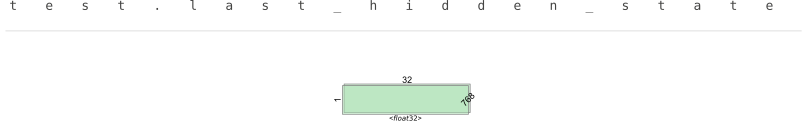

In [ ]:
with ts.explain(char_sep_scale=10):
    test.last_hidden_state

In [ ]:
test.last_hidden_state.shape

torch.Size([1, 32, 768])